# **1) Текстовое описание набора данных**
     
В качестве набора данных будет использоваться набор данных по мобильных приложениям в AppleStore - https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

Эта задача является очень актуальной для создания "умных зданий", которые выполняют все требования по кондиционированию воздуха, температурным условиям, но при этом экономят электроэнергию в том случае, если людей в помещении нет.

Датасет состоит из 2 файлов:

1.  AppleStore.csv - обучающая выборка
2.  appleStore_description.csv



# **2) Основные характеристики датасета**

## **Импорт библиотек**

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## **Загрузка данных**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AppleStore.csv to AppleStore (2).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['AppleStore.csv']))

In [5]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [6]:
# Размер датасета
data.shape

(7197, 17)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 7197


In [8]:
# Список колонок
data.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [9]:
# Список колонок с типами данных
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
id - 0
track_name - 0
size_bytes - 0
currency - 0
price - 0
rating_count_tot - 0
rating_count_ver - 0
user_rating - 0
user_rating_ver - 0
ver - 0
cont_rating - 0
prime_genre - 0
sup_devices.num - 0
ipadSc_urls.num - 0
lang.num - 0
vpp_lic - 0


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [12]:
# Определим уникальные значения для целевого признака
data['user_rating'].unique()

array([4. , 3.5, 4.5, 5. , 3. , 2. , 2.5, 0. , 1.5, 1. ])

# **3) Визуальное исследование датасета**
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

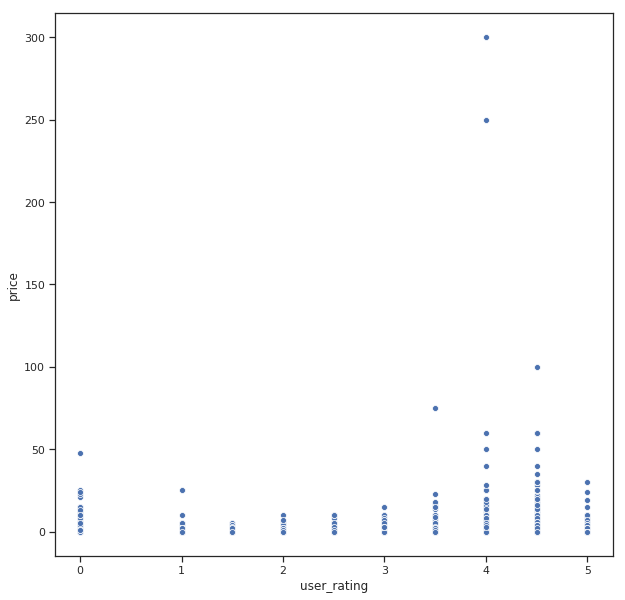

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='user_rating', y='price', data=data)

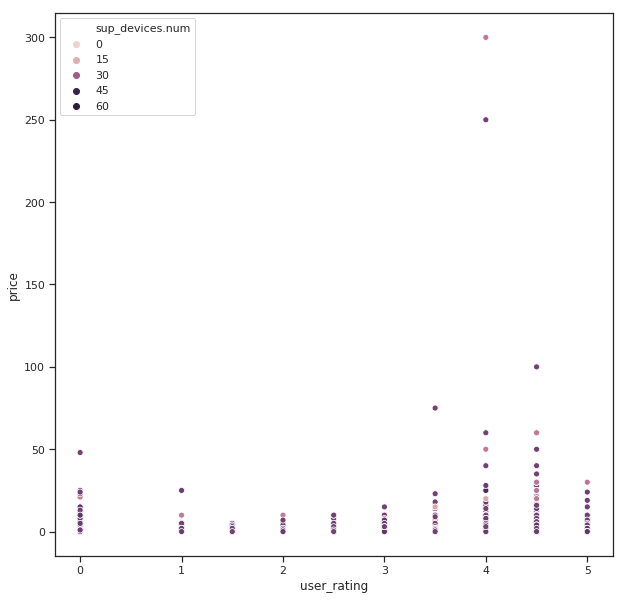

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='user_rating', y='price', data=data, hue='sup_devices.num')

## **Гистограмма**

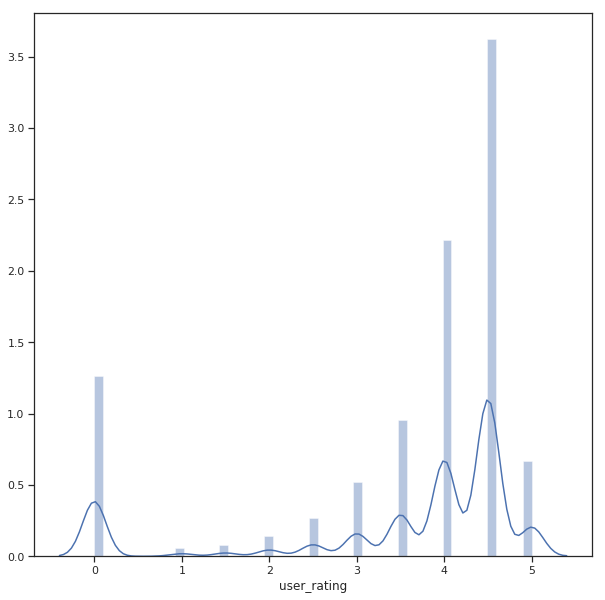

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['user_rating'])

## **Joinplot**

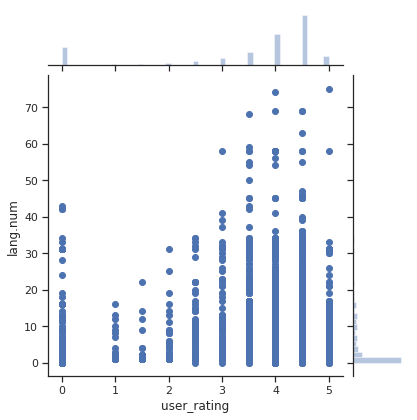

In [29]:
sns.jointplot(x='user_rating', y='lang.num', data=data)

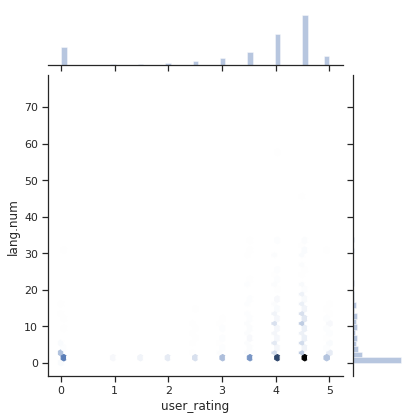

In [28]:
sns.jointplot(x='user_rating', y='lang.num', data=data, kind='hex')

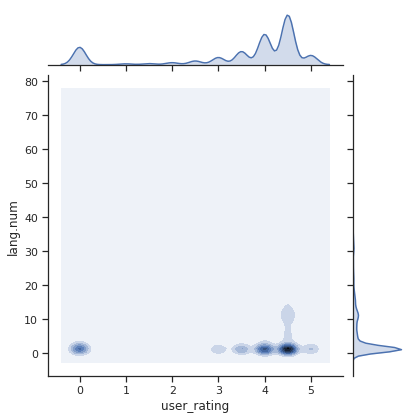

In [30]:
sns.jointplot(x='user_rating', y='lang.num', data=data, kind='kde')

## **"Парные диаграммы"**

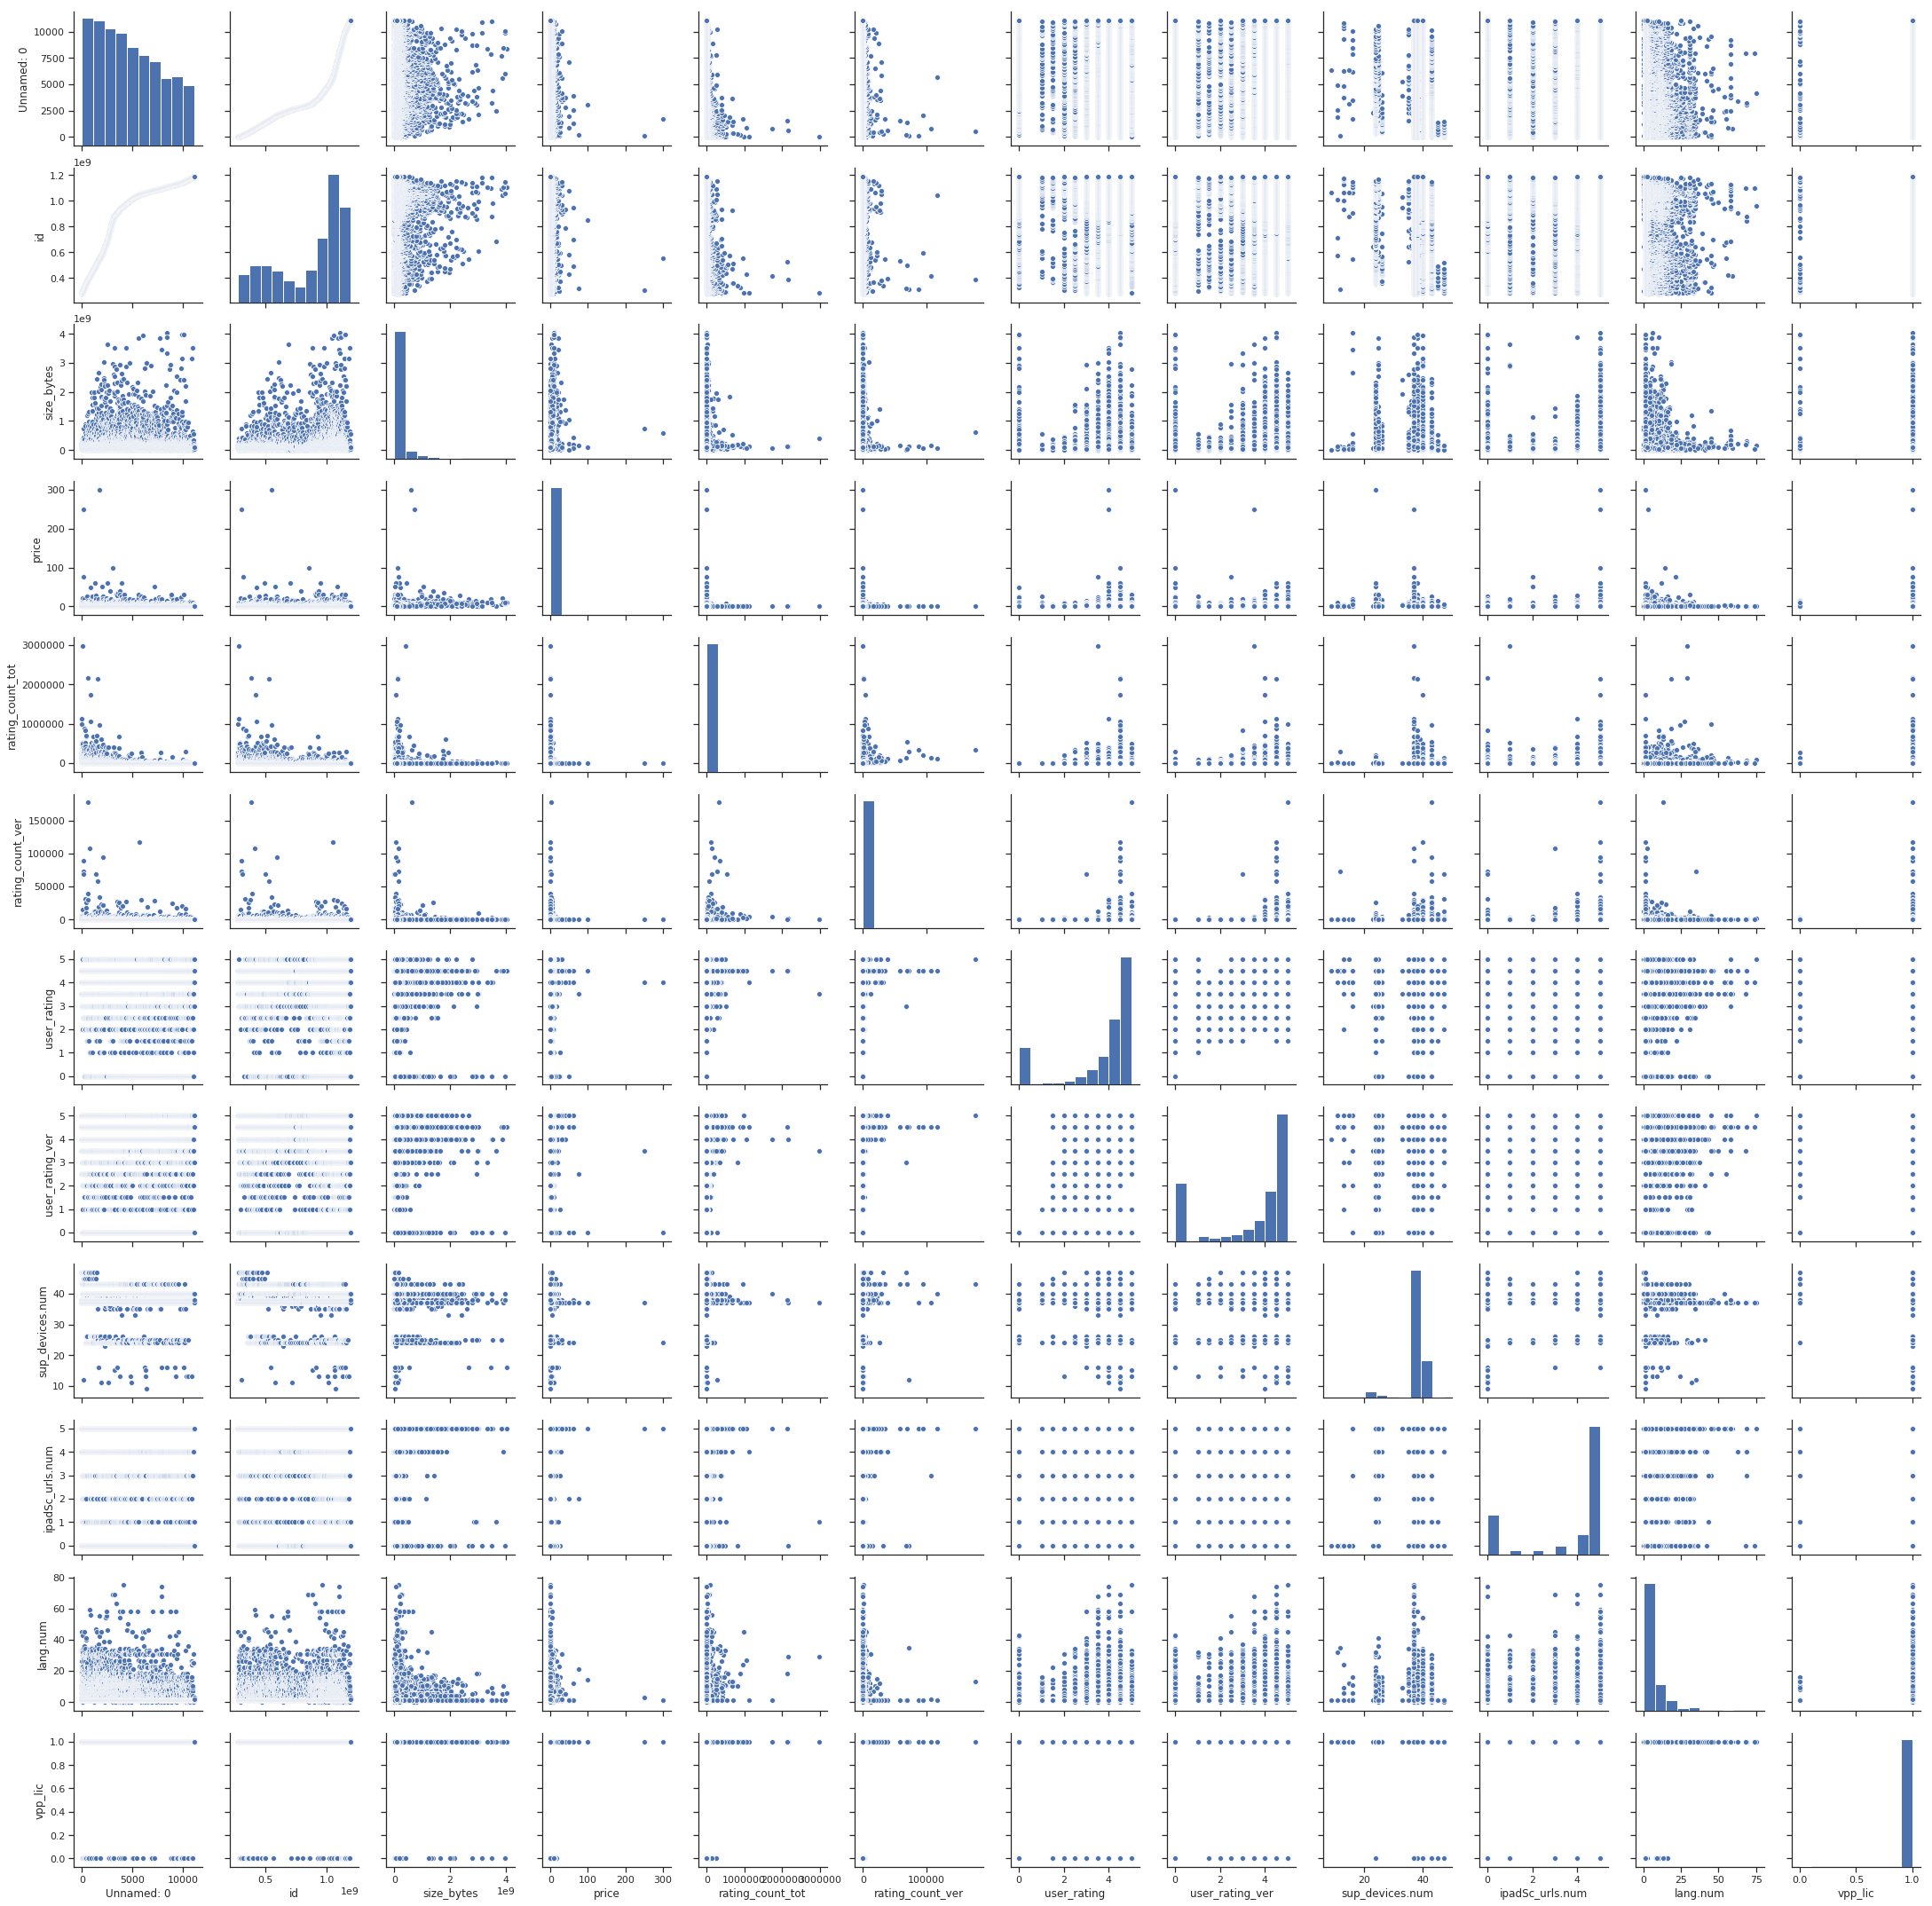

In [31]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


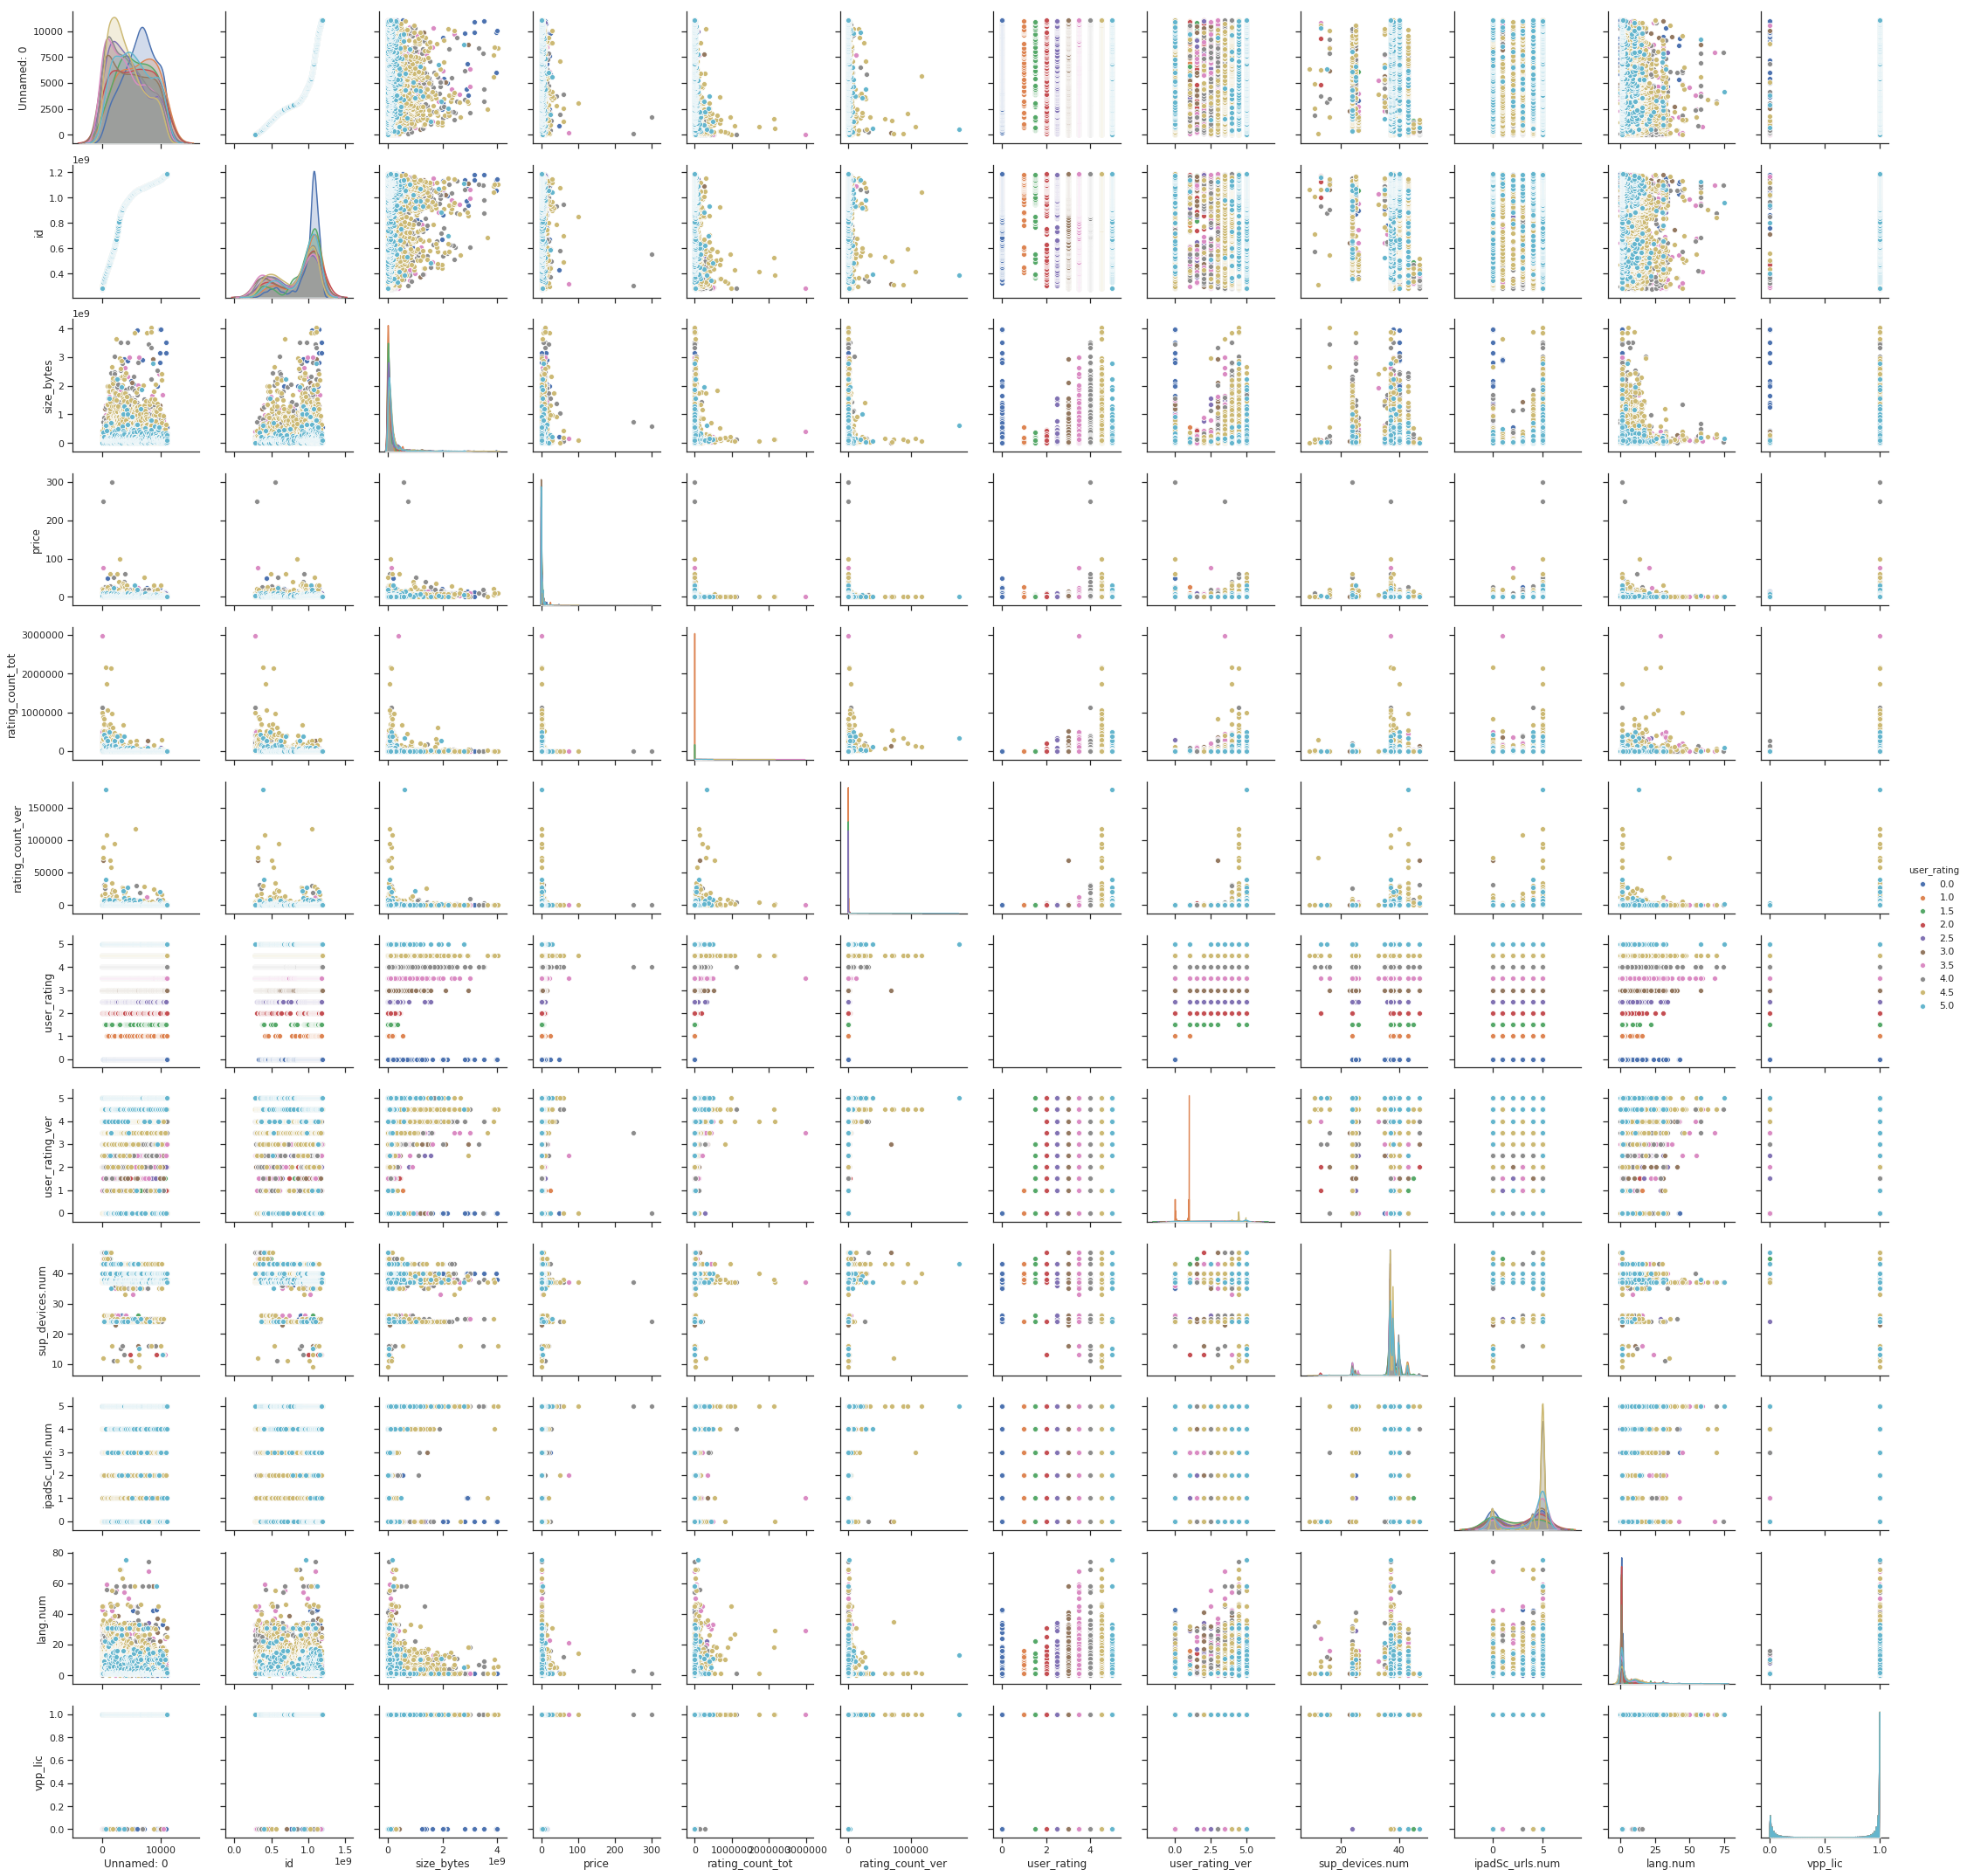

In [32]:
sns.pairplot(data, hue="user_rating")

## **Ящик с усами**

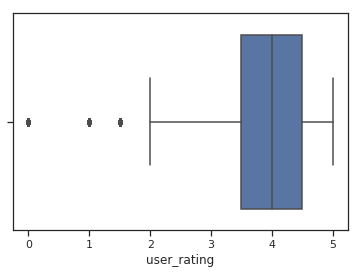

In [33]:
sns.boxplot(x=data['user_rating'])

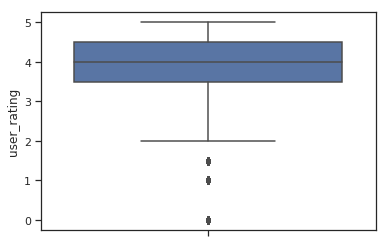

In [34]:
# По вертикали
sns.boxplot(y=data['user_rating'])

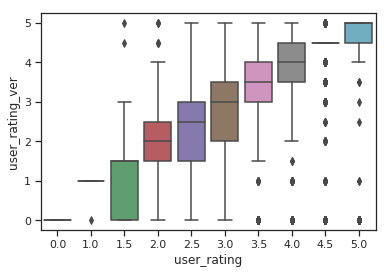

In [36]:
# Распределение параметра user_rating_ver сгруппированные по user_rating.
sns.boxplot(x='user_rating', y='user_rating_ver', data=data)

## **Violin plot**

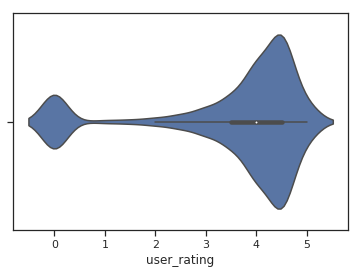

In [38]:

sns.violinplot(x=data['user_rating'])

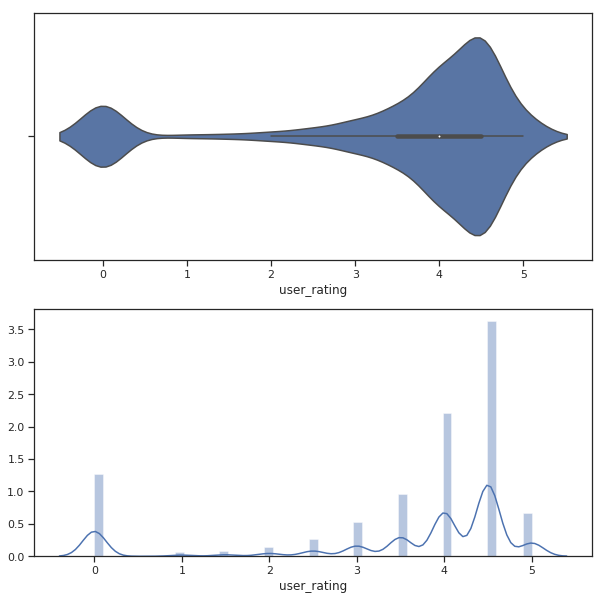

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['user_rating'])
sns.distplot(data['user_rating'], ax=ax[1])

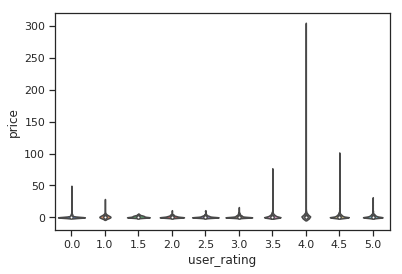

In [41]:
# Распределение параметра price сгруппированные по user_rating.
sns.violinplot(x='user_rating', y='price', data=data)

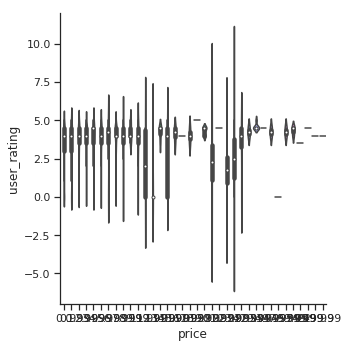

In [66]:
sns.catplot(y='user_rating', x='price', data=data, kind="violin", split=True)

## **Корреляционные матрицы**

In [45]:

data.corr(method='pearson')

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,0.910714,0.041277,-0.074326,-0.168640,-0.064717,-0.204867,-0.127580,0.024648,0.014589,-0.148487,0.000501
id,0.910714,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743
size_bytes,0.041277,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,-0.074326,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,-0.168640,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,-0.064717,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,-0.204867,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,-0.127580,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,0.024648,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.014589,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901


In [47]:
data.corr(method='kendall')

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,1.000000,0.046355,-0.111122,-0.325483,-0.140087,-0.089297,-0.076096,0.034404,0.011097,-0.127586,0.005013
id,1.000000,1.000000,0.046355,-0.111122,-0.325483,-0.140087,-0.089297,-0.076096,0.034404,0.011097,-0.127586,0.005013
size_bytes,0.046355,0.046355,1.000000,0.047233,0.107414,0.110773,0.116266,0.105794,0.015110,0.279588,0.065207,-0.024916
price,-0.111122,-0.111122,0.047233,1.000000,-0.062836,0.027679,0.068234,0.078965,-0.005798,0.102258,0.008775,-0.031300
rating_count_tot,-0.325483,-0.325483,0.107414,-0.062836,1.000000,0.586412,0.397702,0.367031,-0.061228,0.147709,0.185850,0.023638
rating_count_ver,-0.140087,-0.140087,0.110773,0.027679,0.586412,1.000000,0.385948,0.444056,0.060876,0.175720,0.112699,0.021002
user_rating,-0.089297,-0.089297,0.116266,0.068234,0.397702,0.385948,1.000000,0.640035,0.014741,0.197511,0.138074,0.055051
user_rating_ver,-0.076096,-0.076096,0.105794,0.078965,0.367031,0.444056,0.640035,1.000000,-0.005660,0.198487,0.129746,0.037570
sup_devices.num,0.034404,0.034404,0.015110,-0.005798,-0.061228,0.060876,0.014741,-0.005660,1.000000,0.052610,-0.093839,-0.037934
ipadSc_urls.num,0.011097,0.011097,0.279588,0.102258,0.147709,0.175720,0.197511,0.198487,0.052610,1.000000,0.090673,0.061790


In [48]:
data.corr(method='spearman')

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,1.000000,0.069115,-0.149284,-0.472812,-0.205097,-0.126441,-0.105574,0.048324,0.014683,-0.173242,0.006139
id,1.000000,1.000000,0.069115,-0.149284,-0.472812,-0.205097,-0.126441,-0.105574,0.048324,0.014683,-0.173242,0.006139
size_bytes,0.069115,0.069115,1.000000,0.067273,0.161708,0.163161,0.161290,0.149332,0.018922,0.362570,0.090474,-0.030514
price,-0.149284,-0.149284,0.067273,1.000000,-0.087833,0.033926,0.082622,0.096503,-0.008989,0.118101,0.011450,-0.034180
rating_count_tot,-0.472812,-0.472812,0.161708,-0.087833,1.000000,0.762076,0.507648,0.486164,-0.081478,0.189967,0.250726,0.028722
rating_count_ver,-0.205097,-0.205097,0.163161,0.033926,0.762076,1.000000,0.491654,0.569864,0.080762,0.223652,0.149575,0.025208
user_rating,-0.126441,-0.126441,0.161290,0.082622,0.507648,0.491654,1.000000,0.711775,0.018424,0.232260,0.174390,0.061501
user_rating_ver,-0.105574,-0.105574,0.149332,0.096503,0.486164,0.569864,0.711775,1.000000,-0.006035,0.235104,0.165961,0.042367
sup_devices.num,0.048324,0.048324,0.018922,-0.008989,-0.081478,0.080762,0.018424,-0.006035,1.000000,0.060939,-0.113684,-0.041181
ipadSc_urls.num,0.014683,0.014683,0.362570,0.118101,0.189967,0.223652,0.232260,0.235104,0.060939,1.000000,0.108038,0.065479


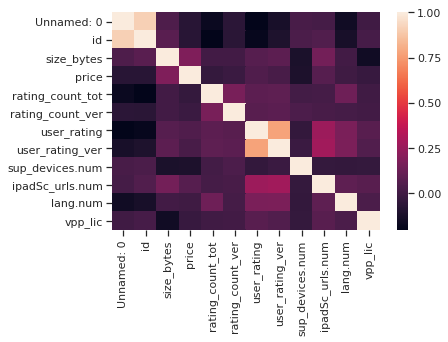

In [49]:
sns.heatmap(data.corr())

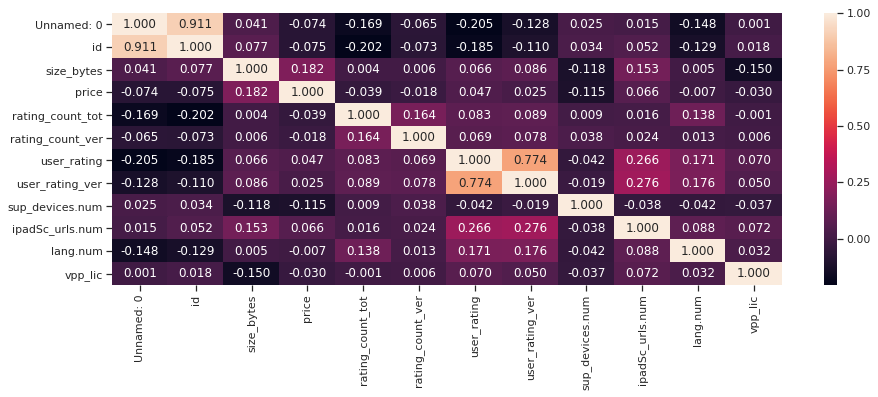

In [58]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

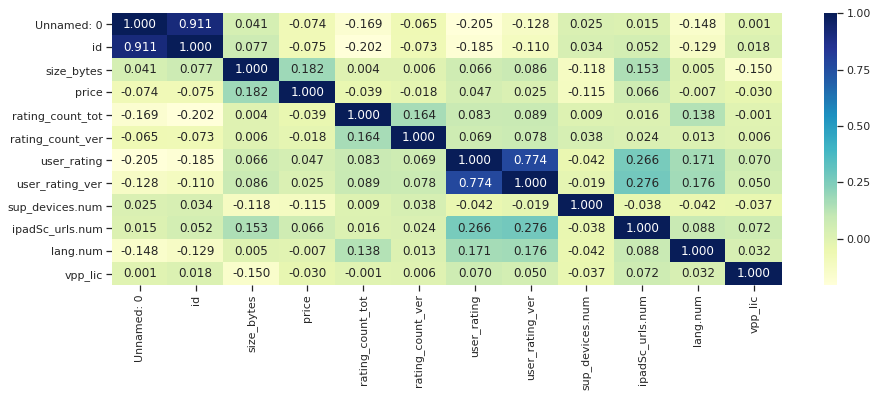

In [59]:

# Изменение цветовой гаммы
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

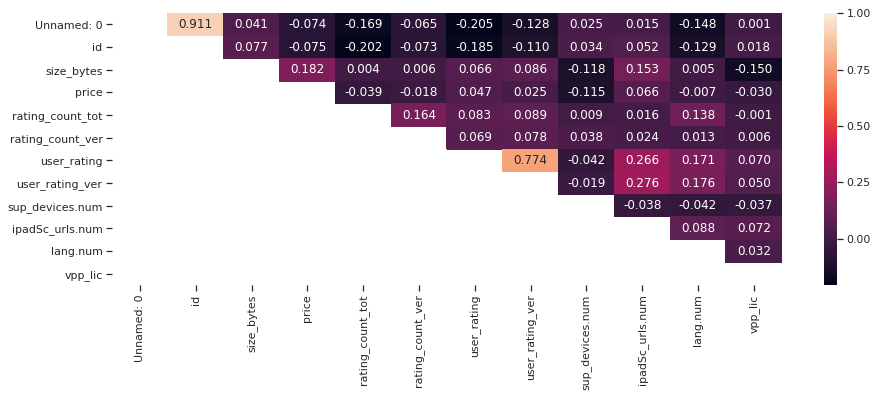

In [60]:
# Треугольный вариант матрицы
fig, ax = plt.subplots(figsize=(15,5))
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

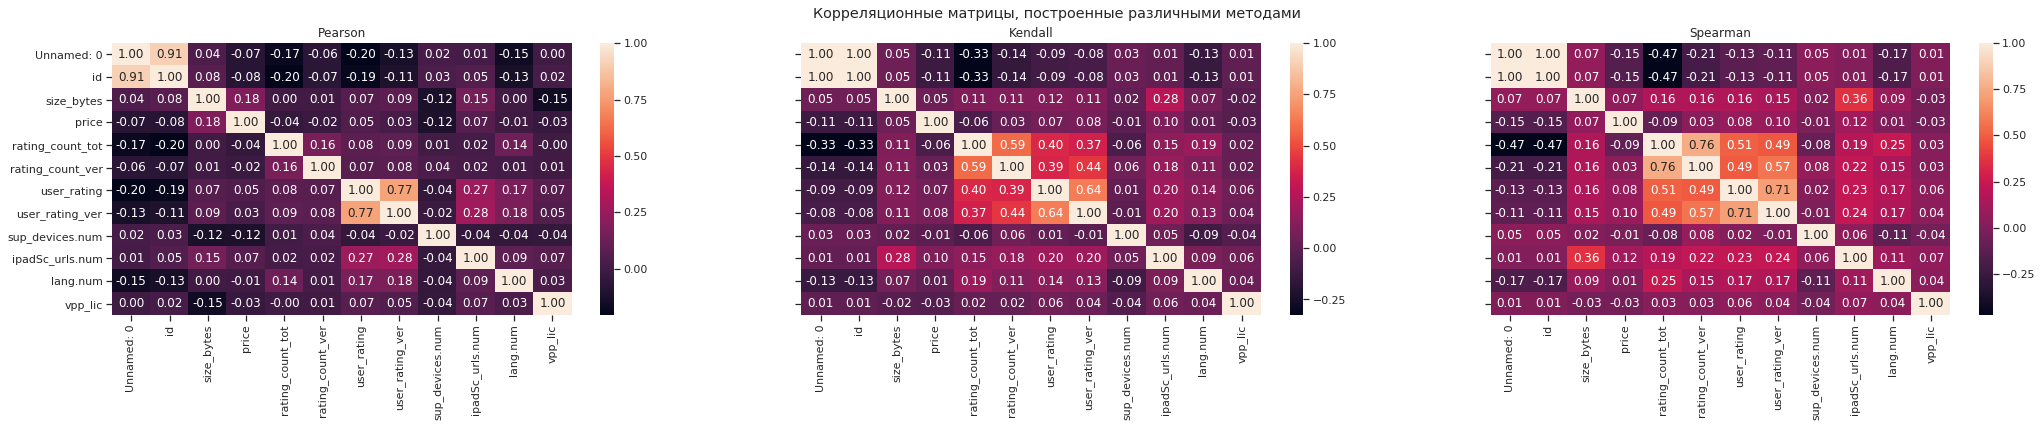

In [55]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(35,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')